# Homework: FashionMNIST

For this homework assignment, you are asked to build a neural network classifier on the FasionMNIST dataset. The FashionMNIST dataset has a lot in common with the MNIST dataset:
- The dataset contains 70,000 grayscale images, split into training set (60,000 images) and test set (10,000 images).
- The resolution of images is 28 by 28 pixels.
- There are a total of 10 target labels.

<img src="https://tensorflow.org/images/fashion-mnist-sprite.png" width="600">

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
print("Tensorflow Version: ", tf.__version__)

Tensorflow Version:  2.9.2


In [3]:
# make numpy values readable
np.set_printoptions(precision = 3, suppress = True)

In [4]:
# import the dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data() 

In [5]:
# list of class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Please complete the following tasks:
1. Scale the values to [0, 1] by dividing every value by 255.0.
2. Use `plt.imshow()` to display the first image from the training set.
3. Build a neural network with three layers:
    - The first layer is a flatten layer of size 28 * 28.
    - The second layer is a dense layer with 128 nodes, with ReLU as activation function.
    - The last layer is a dense layer with 10 nodes with softmax activation.
4. Compile the model, using `adam` as optimizer and `tf.keras.losses.SparseCategoricalCrossentropy()` as loss function. Use `accuracy` as performance metrics.
5. Train the model using `train_images` and `train_labels` for 10 epochs.
6. Evaluate the accuracy on the test set.
7. Compute the confusion matrix over test set. Which type of prediction mistake occurs most frequently?

---

### Convert and display

Scale the numerical values for the images in the `train` and `test` sets to be between zero and one, and then display the first image from the `train` set.

In [6]:
# display the dimension of one of the images
train_images[0].shape

(28, 28)

In [7]:
# show some of the numerical values for the first image
train_images[0][24:26:30]

array([[  2,   0,   0,   0,  66, 200, 222, 237, 239, 242, 246, 243, 244,
        221, 220, 193, 191, 179, 182, 182, 181, 176, 166, 168,  99,  58,
          0,   0]], dtype=uint8)

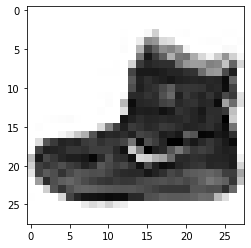

In [8]:
# display the first image
plt.imshow(train_images[0], cmap = "Greys")

In [9]:
# scale the numerical values for all the images to be between zero and one
train_images, test_images = train_images / 255.0, test_images / 255.0

In [10]:
# show the numerical values for the first image again
train_images[0][24:26:30]

array([[0.008, 0.   , 0.   , 0.   , 0.259, 0.784, 0.871, 0.929, 0.937,
        0.949, 0.965, 0.953, 0.957, 0.867, 0.863, 0.757, 0.749, 0.702,
        0.714, 0.714, 0.71 , 0.69 , 0.651, 0.659, 0.388, 0.227, 0.   ,
        0.   ]])

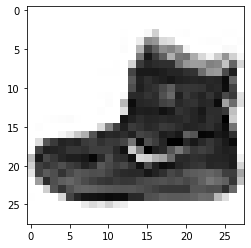

In [11]:
# display the first image again
plt.imshow(train_images[0], cmap = "Greys")

**The scaling does not change the images, only the scale of their numerical values.**

---

### Neural network with three layers

Build a neural network with three layers:

- The first layer is a flatten layer of size 28 * 28.
- The second layer is a dense layer with 128 nodes, with ReLU as activation function.
- The last layer is a dense layer with 10 nodes with softmax activation.

In [12]:
# build a neural network model by stacking layers
nn_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)), # flattens a 28 by 28 matrix into a 1D array with 784 values
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")                                   
])

---

### Configuration

Configure ("compile") the model using `adam` as the optimizer, `tf.keras.losses.SparseCategoricalCrossentropy()` as the loss function, and `accuracy` as performance metrics.

In [13]:
# configure the neural network model
nn_model.compile(optimizer = "adam", loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ["accuracy"])

---

In [14]:
# display the number of parameters
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


The math behind the number of parameters.

- `l` is the length of the 1D array (or the flattened matrix)
- `w` is the number of weight parameters
- `b` is the bias (or the number of nodes)

$w = l * b$

$total = w + b$

In [15]:
# compute the number of parameters for the first dense layer
print("Number of bias parameters:", 128)
print("Number of weight parameters:", 784 * 128)
print("Total parameters:", 784 * 128 + 128)

Number of bias parameters: 128
Number of weight parameters: 100352
Total parameters: 100480


In [16]:
# compute the number of parameters for the second dense layer
print("Number of bias parameters:", 10)
print("Number of weight parameters:", 128 * 10)
print("Total parameters:", 128 * 10 + 10)

Number of bias parameters: 10
Number of weight parameters: 1280
Total parameters: 1290


### Training

Train the model using `train_images` and `train_labels` for 10 epochs.

In [17]:
# train the model to minimize the loss
history = nn_model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4976 - accuracy: 0.8248
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3752 - accuracy: 0.8655
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3375 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3147 - accuracy: 0.8844
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2965 - accuracy: 0.8901
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2819 - accuracy: 0.8951
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2717 - accuracy: 0.8988
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2586 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2485 - accuracy: 0.9065
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.239

---

In [18]:
# display the training parameters
history.params

{'verbose': 1, 'epochs': 10, 'steps': 1875}

In [19]:
# display the loss and accuracy metric
pd.DataFrame(history.history)

,loss,accuracy
0,0.497630,0.824817
1,0.375192,0.865517
2,0.337532,0.876850
3,0.314738,0.884350
4,0.296458,0.890067
5,0.281862,0.895083
6,0.271741,0.898833
7,0.258606,0.903933
8,0.248530,0.906533
9,0.239414,0.911433


**The `loss` and `accuracy` should be inversely proportional. That is to say, the `loss` should be getting smaller as the `accuracy` grows.**

### 6. Evaluation

Since the `loss` and `accuracy` shown above are for the training data Evaluate the accuracy of the model on the test set. 

In [20]:
# evaluate the model on the test images
nn_model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3430 - accuracy: 0.8814


[0.3430449068546295, 0.8813999891281128]

**The accuracy of the model on the test set is somewhat lower.**

In [21]:
# display the corresponding class name for each class number
for i in range(len(class_names)):
  print(f"{i} {class_names[i]}")

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot


In [22]:
# get the predictions on the test set
predictions = nn_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [23]:
# display the first prediction
predictions[0]

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   , 0.037, 0.   ,
       0.962], dtype=float32)

**The model predicted the first image in the `test_images` dataset to be class 9. Using the table above as reference, class 9 corresponds to ankle boots. Display the first image to check if it is an ankle boot.**


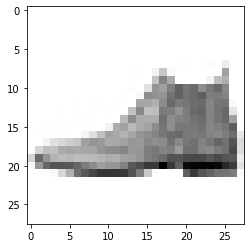

In [24]:
# display the first image in the test set
plt.imshow(test_images[0], cmap = "Greys")

---

### Confusion matrix

Compute the confusion matrix for the test set and determine which type of prediction mistake occurs the most frequently.

The `np.argmax` function returns the indices of the maximum values along an axis.

- `axis = 0` finds the largest value in each column
- `axis = 1` finds the largest value in each row


For future reference, this is the link to a confusion matrix visualization function with performance matrics: https://github.com/DTrimarchi10/confusion_matrix

In [25]:
# get indices of the probability distributions to class predictions
classes = np.argmax(predictions, axis = 1)

In [26]:
# display the first ten classes
classes[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [27]:
# compute the confusion matrix
cm = confusion_matrix(test_labels, classes)

Text(0.5, 42.0, 'Predicted Label')

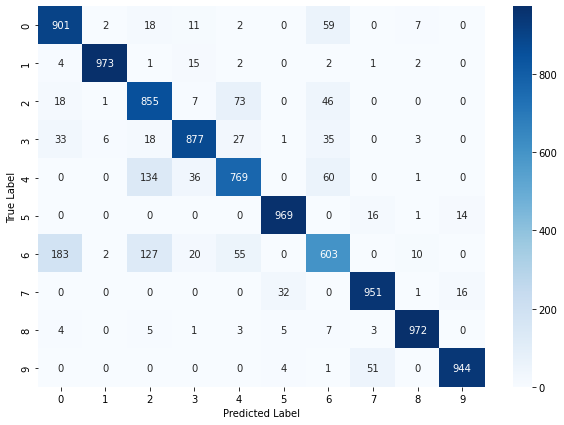

In [28]:
# visualize the confusion matrix because nice visuals are nice
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True, fmt = "", cmap = "Blues")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

**The model mistakens class 6 (t-shirt) for class 0 (shirt) the most and class 4 (coat) for class 2 (pullover) the second most.**